# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [22]:

import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
twit_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twit_enhanced.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [24]:
import requests
web =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
result = requests.get(web)

with open ('image-predictions.tsv', mode='wb') as file:
    file.write(result.content)
    image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [25]:
image_prediction.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [26]:
df=[]
with open("tweet-json")as file:
    
    for line in file:
        df.append(json.loads(line))
    

In [27]:
tweet_js=pd.DataFrame(df,columns=['id', 'retweet_count', 'favorite_count'])

In [28]:
tweet_js.head()

id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

1. the Column names of image prediction file are monduled up. it needs to seperated to allow merging

2. the tweet_json file has a column id instead of tweet_id.

3. unifying values that are recoreded as none or Nan

4. remove columns with retweet

5. Take out columns with empty Retweet

6. tweet_id should be str

7.  Change the timestamp to correct datetime format

8. remove columns not needed

9. Renaming Some columns to have Appropraite name

10. there are some errors in the text columns that needs cleaning

### Tidiness issues
1.  Merging of 3 files into one Data
 2. Create one column for the various dog types: doggo, floofer, pupper, puppo 

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [29]:
# Make copies of original pieces of data

twit_enhanced_clean = twit_enhanced.copy()
image_prediction_clean = image_prediction.copy()
tweet_js_clean = tweet_js.copy()


#### Quality Issue 1

Define: the Column names of image prediction file are monduled up. it needs to seperated to allow merging


Code

In [30]:
image_prediction = pd.read_csv('image-predictions.tsv',sep='\t')

Test

In [10]:
image_prediction.head()


tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

Issue #:2

Define: Renaming id column to tweet_id in the tweet_json file

Code

In [31]:
tweet_js.rename(columns = {'id' : 'tweet_id'}, inplace = True)


In [32]:
tweet_js.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


 Tidiness issue  : 1

Define: Merging Twitter_enhanced file,image prediction file and Tweet_json file

Code

In [33]:
Two_data = pd.merge(twit_enhanced, image_prediction , on=['tweet_id'],how='left')


In [34]:
Merged_Data = pd.merge(Two_data, tweet_js , on=['tweet_id'],how='left')

Test

In [35]:

Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      ...         p1_conf  \
0  https://twitter.com/dog_rates/status/892420643...      ...        0.097049   
1  https://twitter.com/dog_rates/status/892177421...      ...        0.323581   
2  https://twitter.com/dog_rates/status/891815181...      ...        0.716012   
3  https://twitter.com/dog_rates/status/891689557...      ...        0.170278   
4  https://twitter.com/dog_rates/status/891327558...      ...        0.555712   

   p1_dog                  p2   p2_conf p2_dog                           p3  \
0   False               bagel  0.085851  False                       banana   
1    True            Pekinese  0.090647   True                     papillon   
2    True            malamute  0.078253   True                       kelpie   
3   False  Labrador_retriever  0.168086   True                      spatula   
4    True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  retweet_count favorite_count  
0  0.076110  False         8853.0        39467.0  
1  0.068957   True         6514.0        33819.0  
2  0.031379   True         4328.0        25461.0  
3  0.040836  False         8964.0        42908.0  
4  0.175219   True         9774.0        41048.0  

[5 rows x 30 columns]

In [36]:
Merged_Data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator      img_num      p1_conf       p2_conf  \
count         2356.000000  2075.000000  2075.000000  2.075000e+03   
mean            10.455433     1.203855     0.594548  1.345886e-01   
std              6.745237     0.561875     0.271174  1.006657e-01   
min              0.000000     1.000000     0.044333  1.011300e-08   
25%             10.000000     1.000000     0.364412  5.388625e-02   
50%             10.000000     1.000000     0.588230  1.181810e-01   
75%             10.000000     1.000000     0.843855  1.955655e-01   
max            170.000000     4.000000     1.000000  4.880140e-01   

            p3_conf  retweet_count  favorite_count  
count  2.075000e+03    2354.000000     2354.000000  
mean   6.032417e-02    3164.797366     8080.968564  
std    5.090593e-02    5284.770364    11814.771334  
min    1.740170e-10       0.000000        0.000000  
25%    1.622240e-02     624.500000     1415.000000  
50%    4.944380e-02    1473.500000     3603.500000  
75%    9.180755e-02    3652.000000    10122.250000  
max    2.734190e-01   79515.000000   132810.000000

In [37]:
Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls      ...         p1_conf  \
0  https://twitter.com/dog_rates/status/892420643...      ...        0.097049   
1  https://twitter.com/dog_rates/status/892177421...      ...        0.323581   
2  https://twitter.com/dog_rates/status/891815181...      ...        0.716012   
3  https://twitter.com/dog_rates/status/891689557...      ...        0.170278   
4  https://twitter.com/dog_rates/status/891327558...      ...        0.555712   

   p1_dog                  p2   p2_conf p2_dog                           p3  \
0   False               bagel  0.085851  False                       banana   
1    True            Pekinese  0.090647   True                     papillon   
2    True            malamute  0.078253   True                       kelpie   
3   False  Labrador_retriever  0.168086   True                      spatula   
4    True    English_springer  0.225770   True  German_short-haired_pointer   

    p3_conf p3_dog  retweet_count favorite_count  
0  0.076110  False         8853.0        39467.0  
1  0.068957   True         6514.0        33819.0  
2  0.031379   True         4328.0        25461.0  
3  0.040836  False         8964.0        42908.0  
4  0.175219   True         9774.0        41048.0  

[5 rows x 30 columns]

In [38]:
Merged_Data.tail()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
2351  2015-11-16 00:24:50 +0000   
2352  2015-11-16 00:04:52 +0000   
2353  2015-11-15 23:21:54 +0000   
2354  2015-11-15 23:05:30 +0000   
2355  2015-11-15 22:32:08 +0000   

                                                 source  \
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2351  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
2352  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
2353  Here is a very happy pup. Big fan of well-main...                  NaN   
2354  This is a western brown Mitsubishi terrier. Up...                  NaN   
2355  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2351                       NaN                        NaN   
2352                       NaN                        NaN   
2353                       NaN                        NaN   
2354                       NaN                        NaN   
2355                       NaN                        NaN   

                                          expanded_urls      ...        \
2351  https://twitter.com/dog_rates/status/666049248...      ...         
2352  https://twitter.com/dog_rates/status/666044226...      ...         
2353  https://twitter.com/dog_rates/status/666033412...      ...         
2354  https://twitter.com/dog_rates/status/666029285...      ...         
2355  https://twitter.com/dog_rates/status/666020888...      ...         

       p1_conf  p1_dog                  p2   p2_conf p2_dog  \
2351  0.560311    True          Rottweiler  0.243682   True   
2352  0.408143    True             redbone  0.360687   True   
2353  0.596461    True            malinois  0.138584   True   
2354  0.506826    True  miniature_pinscher  0.074192   True   
2355  0.465074    True              collie  0.156665   True   

                       p3   p3_conf p3_dog  retweet_count favorite_count  
2351             Doberman  0.154629   True           41.0          111.0  
2352   miniature_pinscher  0.222752   True          147.0          311.0  
2353           bloodhound  0.116197   True           47.0          128.0  
2354  Rhodesian_ridgeback  0.072010   True           48.0          132.0  
2355    Shetland_sheepdog  0.061428   True          532.0         2535.0  

[5 rows x 30 columns]

In [39]:
Merged_Data.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
jpg_url                       2009
img_num                          4
p1                             378
p1_conf                       2006
p1_dog                           2
p2                             405
p2_conf                       2004
p2_dog                           2
p3                             408
p3_conf                       2006
p3_dog                           2
retweet_count       

In [40]:
Merged_Data.isnull().sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  timestamp  source  \
1273     False                   True                 True      False   False   
1363     False                   True                 True      False   False   
492      False                   True                 True      False   False   
0        False                   True                 True      False   False   
706      False                   True                 True      False   False   
1580     False                   True                 True      False   False   
1457     False                   True                 True      False   False   
1352     False                   True                 True      False   False   
573      False                   True                 True      False   False   
407      False                   True                 True      False   False   

       text  retweeted_status_id  retweeted_status_user_id  \
1273  False                 True                      True   
1363  False                 True                      True   
492   False                 True                      True   
0     False                 True                      True   
706   False                 True                      True   
1580  False                 True                      True   
1457  False                 True                      True   
1352  False                 True                      True   
573   False                 True                      True   
407   False                 True                      True   

      retweeted_status_timestamp  expanded_urls       ...        p1_conf  \
1273                        True          False       ...          False   
1363                        True          False       ...          False   
492                         True          False       ...          False   
0                           True          False       ...          False   
706                         True          False       ...          False   
1580                        True          False       ...          False   
1457                        True          False       ...          False   
1352                        True          False       ...          False   
573                         True          False       ...          False   
407                         True          False       ...          False   

      p1_dog     p2  p2_conf  p2_dog     p3  p3_conf  p3_dog  retweet_count  \
1273   False  False    False   False  False    False   False          False   
1363   False  False    False   False  False    False   False          False   
492    False  False    False   False  False    False   False          False   
0      False  False    False   False  False    False   False          False   
706    False  False    False   False  False    False   False          False   
1580   False  False    False   False  False    False   False          False   
1457   False  False    False   False  False    False   False          False   
1352   False  False    False   False  False    False   False          False   
573    False  False    False   False  False    False   False          False   
407    False  False    False   False  False    False   False          False   

      favorite_count  
1273           False  
1363           False  
492            False  
0              False  
706            False  
1580           False  
1457           False  
1352           False  
573            False  
407            False  

[10 rows x 30 columns]

Issue #:3

Define: Unify values that  are recoreded as none or Nan

#### Code

In [41]:
Merged_Data.replace('None', np.nan, inplace=True)

#### Test

In [42]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          1611 non-null object
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
jpg_url                       2075 non-

Issue #4:

Define:remove columns with retweets 

Code

In [43]:
Merged_Data = Merged_Data[Merged_Data.retweeted_status_id.isnull()]
Merged_Data = Merged_Data[Merged_Data.retweeted_status_user_id.isnull()]
Merged_Data = Merged_Data[Merged_Data.retweeted_status_timestamp.isnull()]


Test

In [44]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1495 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
jpg_url                       1994 non-null o

Issue 5

Define:Take out columns with empty Retweet

In [45]:
Merged_Data.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

In [46]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       1994

 issue 6

#### Define: Tweet _id should be in str not int

#### Code

In [47]:
Merged_Data['tweet_id'] = Merged_Data['tweet_id'].astype(str)

#### Test

In [48]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
p2                       199

Issue: 7

Define: Change the timestamp to correct datetime format



Code

In [49]:
Merged_Data['timestamp'] = Merged_Data['timestamp'].str.slice(start=0, stop=-6)
Merged_Data['timestamp'] = pd.to_datetime(Merged_Data['timestamp'], format = "%Y-%m-%d %H:%M:%S")


Test

In [50]:
Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name      ...         p1_conf p1_dog  \
0                  10   Phineas      ...        0.097049  False   
1                  10     Tilly      ...        0.323581   True   
2                  10    Archie      ...        0.716012   True   
3                  10     Darla      ...        0.170278  False   
4                  10  Franklin      ...        0.555712   True   

                   p2   p2_conf p2_dog                           p3   p3_conf  \
0               bagel  0.085851  False                       banana  0.076110   
1            Pekinese  0.090647   True                     papillon  0.068957   
2            malamute  0.078253   True                       kelpie  0.031379   
3  Labrador_retriever  0.168086   True                      spatula  0.040836   
4    English_springer  0.225770   True  German_short-haired_pointer  0.175219   

   p3_dog retweet_count favorite_count  
0   False        8853.0        39467.0  
1    True        6514.0        33819.0  
2    True        4328.0        25461.0  
3   False        8964.0        42908.0  
4    True        9774.0        41048.0  

[5 rows x 27 columns]

Issue :8

Define: remove columns not needed

Code

In [51]:
Merged_Data.drop (['jpg_url','img_num', 'p2','p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1 , inplace =True)
 

Test

In [52]:
Merged_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     1495 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null object
retweet_count            2175 non-null float64
favorite_count           2175 non-null float64
dtypes: datetime64[

 Issue 9

Define: Renaming Some columns to have Appropraite name

Code

In [53]:

Merged_Data.rename({'p1': 'breed' , 'p1_conf': 'pred_confidence' , 'p1_dog': 'is_dog' }, inplace = True)

Test

In [54]:
Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo           p1  \
0                  10   Phineas   NaN     NaN    NaN   NaN       orange   
1                  10     Tilly   NaN     NaN    NaN   NaN    Chihuahua   
2                  10    Archie   NaN     NaN    NaN   NaN    Chihuahua   
3                  10     Darla   NaN     NaN    NaN   NaN  paper_towel   
4                  10  Franklin   NaN     NaN    NaN   NaN       basset   

    p1_conf p1_dog  retweet_count  favorite_count  
0  0.097049  False         8853.0         39467.0  
1  0.323581   True         6514.0         33819.0  
2  0.716012   True         4328.0         25461.0  
3  0.170278  False         8964.0         42908.0  
4  0.555712   True         9774.0         41048.0

Issue #:10

Define:  Merged_Data table has some errors in the text column that needs cleaning


code

In [55]:
Merged_Data['text'] = Merged_Data.text.str.replace("&amp;", "&")
Merged_Data['text'] = Merged_Data.text.str.replace("\n", " ")
Merged_Data['text'] = Merged_Data.text.str.replace(r"http\S+", "")
Merged_Data['text'] = Merged_Data.text.str.strip()

Test

In [56]:
Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo           p1  \
0                  10   Phineas   NaN     NaN    NaN   NaN       orange   
1                  10     Tilly   NaN     NaN    NaN   NaN    Chihuahua   
2                  10    Archie   NaN     NaN    NaN   NaN    Chihuahua   
3                  10     Darla   NaN     NaN    NaN   NaN  paper_towel   
4                  10  Franklin   NaN     NaN    NaN   NaN       basset   

    p1_conf p1_dog  retweet_count  favorite_count  
0  0.097049  False         8853.0         39467.0  
1  0.323581   True         6514.0         33819.0  
2  0.716012   True         4328.0         25461.0  
3  0.170278  False         8964.0         42908.0  
4  0.555712   True         9774.0         41048.0

Tidiness Issues 2

Define: Create one column for the various dog types: doggo, floofer, pupper, puppo

Code

In [57]:
Merged_Data['Dog_stage'] = Merged_Data['text'].str.extract('(doggo|floofer|pupper|puppo)')
Merged_Data = Merged_Data.drop(columns=['doggo','floofer','pupper','puppo'])

In [36]:
Merged_Data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name           p1   p1_conf p1_dog  retweet_count  \
0                  10   Phineas       orange  0.097049  False         8853.0   
1                  10     Tilly    Chihuahua  0.323581   True         6514.0   
2                  10    Archie    Chihuahua  0.716012   True         4328.0   
3                  10     Darla  paper_towel  0.170278  False         8964.0   
4                  10  Franklin       basset  0.555712   True         9774.0   

   favorite_count Dog_stage  
0         39467.0       NaN  
1         33819.0       NaN  
2         25461.0       NaN  
3         42908.0       NaN  
4         41048.0       NaN

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
Merged_Data.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [93]:
Merged_Data.head()


tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name           p1   p1_conf p1_dog  retweet_count  \
0                  10   Phineas       orange  0.097049  False         8853.0   
1                  10     Tilly    Chihuahua  0.323581   True         6514.0   
2                  10    Archie    Chihuahua  0.716012   True         4328.0   
3                  10     Darla  paper_towel  0.170278  False         8964.0   
4                  10  Franklin       basset  0.555712   True         9774.0   

   favorite_count Dog_stage  
0         39467.0       NaN  
1         33819.0       NaN  
2         25461.0       NaN  
3         42908.0       NaN  
4         41048.0       NaN

### Insights:

1. pupper stage Dog has the highest percentage with 67.0%
2. The Floofer Dog stage has the lowest perecentage with 11%
3. The pupper and Doggo stage Dogs have the most counts 

### Visualization

In [59]:
x=Merged_Data['Dog_stage'].value_counts()

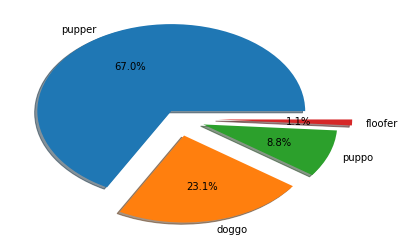

In [60]:
plt.pie(x,labels=['pupper','doggo','puppo','floofer'],shadow=True,explode=(.1,.2,.2,.3),autopct='%1.1f%%')
plt.show()